In [1]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
# list of TV show titles to query
tv_shows = ["Altered Carbon", "Grey's Anatomy", "This Is Us", "The Flash", "Vikings",
        "Shameless", "Arrow", "Peaky Blinders", "Dirk Gently"]
print(tv_shows)

shows = [show.replace(" ", "%20") for show in tv_shows]

# TV Maze show search base URL
url = 'https://api.tvmaze.com/singlesearch/shows?q='

# set up lists to hold response data for name and rating
rating = []


# loop through TV show titles, make requests and parse
for show in shows:
    _ = requests.get(url + show)
    x = _.json()
    pprint(x)
    rating.append(x['rating'])



['Altered Carbon', "Grey's Anatomy", 'This Is Us', 'The Flash', 'Vikings', 'Shameless', 'Arrow', 'Peaky Blinders', 'Dirk Gently']
{'_links': {'previousepisode': {'href': 'https://api.tvmaze.com/episodes/2154820'},
            'self': {'href': 'https://api.tvmaze.com/shows/12036'}},
 'averageRuntime': 52,
 'dvdCountry': None,
 'ended': '2020-03-19',
 'externals': {'imdb': 'tt2261227', 'thetvdb': 332331, 'tvrage': None},
 'genres': ['Drama', 'Crime', 'Science-Fiction'],
 'id': 12036,
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/240/602152.jpg',
           'original': 'https://static.tvmaze.com/uploads/images/original_untouched/240/602152.jpg'},
 'language': 'English',
 'name': 'Altered Carbon',
 'network': None,
 'officialSite': 'https://www.netflix.com/title/80097140',
 'premiered': '2018-02-02',
 'rating': {'average': 8},
 'runtime': None,
 'schedule': {'days': [], 'time': ''},
 'status': 'Ended',
 'summary': '<p><b>Altered Carbon</b> is set in the 25t

In [4]:
# create DataFrame
df = pd.DataFrame(rating, tv_shows)
df = df.reset_index().rename(columns={'index': 'title', 'average': 'rating'})
df

,title,rating
0,Altered Carbon,8.0
1,Grey's Anatomy,7.7
2,This Is Us,7.9
3,The Flash,7.6
4,Vikings,8.6
5,Shameless,8.5
6,Arrow,7.4
7,Peaky Blinders,8.5
8,Dirk Gently,7.4


<Axes: xlabel='title'>

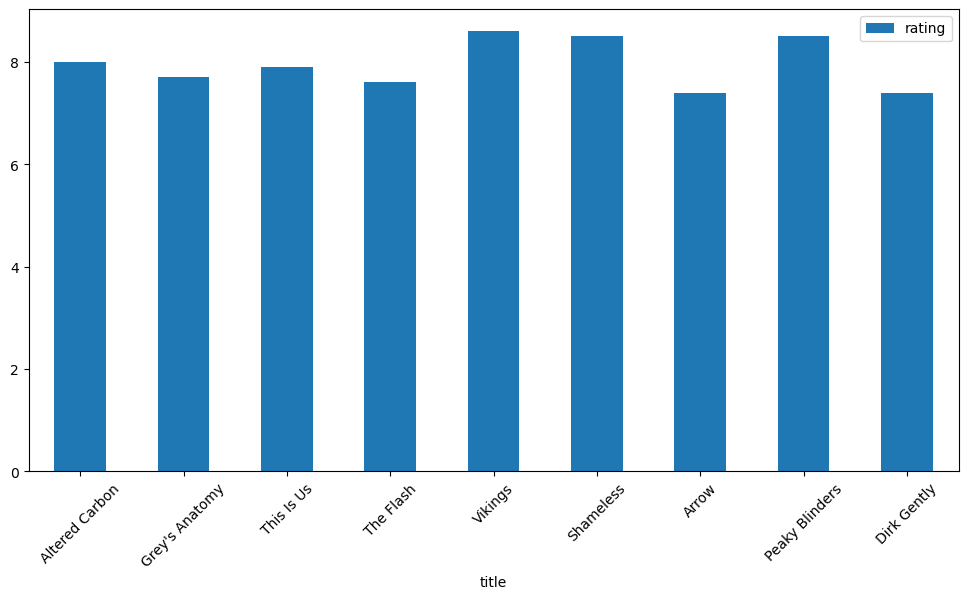

In [5]:
# Plot the data
df.plot.bar('title', 'rating', rot=45, figsize=(12,6))